# Pytorch构建神经网络（一）（1-13节）

## 1.Pytorch介绍

### 1.1 pytorch简介

#### 1.1.1 pytorch简介
* pytorch 是深度学习框架和科学计算包
* pytorch之所以可以进行科学计算是因为它是一个**张量**库并且有相关的张量运算
* pytorch和numpy有很强的互操作性，原因：1.张量和数组具有相似性； ~~2.pytorch的torch.tensor对象是由numpy的ndarray创建的，它们共享内存；~~ 2.提供内存共享的方法,减少内存使用,提高效率
* pytorch 张量运算可在GPU上运行；

In [45]:
import numpy as np
import torch

# np_array = np.array([1, 2, 3])
# torch_tensor = torch.tensor(np_array)
# torch_tensor[0] = 10

# np_array = np.array([1, 2, 3])
# torch_tensor = torch.from_numpy(np_array)
# torch_tensor[0] = 10

# torch_tensor = torch.tensor([1, 2, 3], dtype=torch.float32)
# np_array = torch_tensor.numpy()
# # 修改np_array会影响torch_tensor，因为它们共享内存
# np_array[0] = 10

print(np_array)
print(torch_tensor)

[10.  2.  3.]
tensor([10.,  2.,  3.])


#### 1.1.2 pytorch简史
* pytorch的前身是torch，torch是基于lua语言(该语言晦涩难懂且生态系统很小)；
* pytorch的发起者是facebook的研究员Soumith Chintala

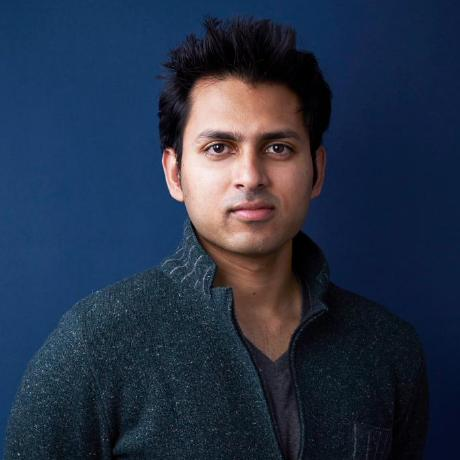

#### 1.1.3 pytorch 库
* torch: 包含所有torch包和tensor库的顶级包
* troch.nn: 是用于建立神经网络的包，它包含类和模块，如layer,weight和forward function
* torch.autograd: 支持张量的导数运算，负责优化神经网络
* torch.nn.function: 访问损失函数的API
* torch.optim: 访问优化器 (SGD,ADAM...)
* torch.utils: 包含数据集和数据加载器的实用程序类
* torchvision: 访问流行的数据集、计算机视觉中的模型框架及图像转换
* 所有深度学习框架都有两个特性:张量库和计算导数的包(在pytorch中是torch和torch.autograd)

#### 1.1.4 pytorch的特点
* pytorch is modern, pythonic and thin design
* pytorch is a python extension
* pytorch的简单性使其具有更长的寿命
* pytorch是研究中首选框架的原因：pytorch的计算图是动态的，而其他框架通常是静态的，许多深度学习领域的前沿研究都需要动态图或从动态图中获益
* 计算图是用于描绘神经网络中张量的函数操作，通常用于计算优化神经网络权重所需的导数

### 1.2 Pytorch的安装

#### 1.2.1 pytorch安装
* step1: 下载并安装anaconda（https://www.anaconda.com/distribution/）
* step2：进入pytorch网站（https://pytorch.org/）, 选择相应的配置，会出现相应的命令行，复制在终端并运行，即可安装；
* 不需要自己额外安装Cuda，安装pytorch时Cuda会自动安装；


#### 1.2.2 pytorch安装验证

In [57]:
import torch         # 导入pytorch

In [58]:
print(torch.__version__)   #打印pytorch的版本

2.2.2


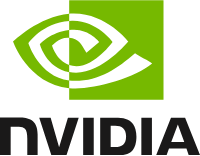

CUDA（Compute Unified Device Architecture）是由NVIDIA开发的一个并行计算平台和应用程序接口（API），允许软件开发者和软件工程师使用NVIDIA GPU（图形处理单元）进行通用计算。简而言之，CUDA让开发者能够利用NVIDIA的GPU来进行高性能计算（HPC）。

在机器学习和深度学习领域，CUDA尤其重要，因为这些领域的算法和模型通常需要大量的矩阵运算，这是GPU擅长的任务。使用CUDA，开发者可以显著加速这些计算，从而加快模型的训练和推断过程。

CUDA编程模型提供了一系列扩展的C/C++语言关键字和函数，允许开发者定义在GPU上运行的函数（称为kernels）。当一个CUDA程序在CPU上运行时，它可以在适当的时刻调用这些kernels，在GPU上并行执行大量的计算操作。

2000年代中期，研究人员开始尝试利用GPU加速非图形应用。特别是，在2007年，一个重要的转折点出现了：NVIDIA发布了CUDA（Compute Unified Device Architecture），这是一个并行计算平台和编程模型，允许开发者使用NVIDIA的GPU进行通用计算。

CUDA的发布极大地促进了GPU在科学计算和深度学习中的应用。研究人员和开发者能够更容易地编写代码来利用GPU的并行处理能力，而不必深入了解复杂的图形API。

在深度学习领域，GPU的使用被广泛认为是在2012年取得了显著的突破，当时Alex Krizhevsky、Ilya Sutskever和Geoffrey Hinton开发了AlexNet，这是一个深度卷积神经网络，它在ImageNet竞赛中取得了压倒性的胜利。AlexNet的训练使用了两块NVIDIA GTX 580 GPU，这个成功案例展示了使用GPU加速深度学习训练的巨大潜力。

In [59]:
torch.cuda.is_available()


False

In [60]:
print(torch.version.cuda)   #看cuda的版本  
print("Is Metal available:", torch.backends.mps.is_available()) #看Mac的版本,Metal Performance Shaders

None
Is Metal available: True


### 1.3 CUDA简介

#### 1.3.1 GPU的运算
* 最适合GPU的运算是可以并行完成的运算
* 并行计算：一个特定的计算被分解成独立的可以同时进行的很小的计算，得到的计算被重新组合和同步，以形成原始较大的计算结果
* 一个更大的计算可以被分解的任务的数量取决于硬件上的核数（CPU通常是4或16核，而GPU可以有成千上万个核，故GPU可以大大提升运算速度）
* 核是指在给定处理器中进行计算的单元
* 并行计算是使用GPU来完成的 => 最适合GPU的任务是可以并行完成的任务
* 为什么GPU在深度学习中能够如此广泛的使用？——答：因为神经网络是易并行的(embarrassing parallel),即：很容易就能够将任务分解成一组独立的小任务；神经网络的很多计算都可以很容易地分解成更小的相互独立的计算，这使得GPU在深度学习任务中非常有用；
* 一个卷积核对一张图像进行卷积的每个运算是独立且相继发生的，故可将其分成一个个小任务，使用GPU加速运算；


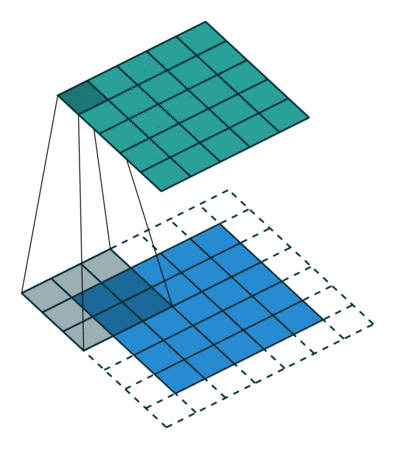

#### 1.3.2 Cudnn (CUDA Deep Neural Network library)
* 用于神经网络的包
* 在安装pytorch时已自带

#### 1.3.3 using Cuda with pytorch

In [61]:
# 定义张量t，默认在CPU上； 再将其放在GPU上进行操作
import torch
import numpy as np

t = torch.Tensor([1,2,3])
t
print(t)
print("Is Metal available:", torch.backends.mps.is_available()) #看Mac的版本

tensor([1., 2., 3.])
Is Metal available: True


In [69]:
#Windows
# t = t.cuda()
# t
# tensor([1, 2, 3], device='cuda:0')

tensor = t.to('mps')
print(tensor) #Metal Performance Shaders

print(t)   


tensor([1., 2., 3.], device='mps:0')
tensor([1., 2., 3.])


* GPU的运算速度比CPU快，为什么不直接在GPU上进行所有运算？ ——答: 将数据从CPU移到GPU代价高昂，如果任务本身较小较简单，这样做反而会让运算速度变慢；GPU对于能够分解成很多小任务的计算效果更好；

* GPU计算堆栈的形式：GPU是底层硬件，Cuda是GPU的顶端软件框架，在Cuda的顶部是Cudnn；

## 2.张量(tensor)

### 2.1 张量介绍

* 张量是神经网络中使用的主要数据结构，网络中的输入、输出和转换均使用张量表示；
* n维张量中，n表示在结构中访问特定元素所需要的索引数量（张量是n维数组）；
* 张量被称为一个泛化的原因：我们可以使用张量来表示所有的n维数组；

| 索引数量 | 计算机科学中的名称 | 数学中的名称 | Tensor表示| 数据维度的解读 |
|------ |:------------------ |:------------ |:------|:----
|    0   |      数字      |    标量    |  0维张量  |   表示单个的值,没有维度    |
|    1   |      数组      |    矢量    |  1维张量  |   表示多个标量的集合   |
|    2   |    二维数组     |    矩阵    |  2维张量  |   表示多个矢量的集合   |
|    n   |    N维数组      |   N维张量   | n维张量  |   表示多个n-1维向量的集合   |

![image.png](attachment:image.png)

* 注意：张量的维度跟我们所说的向两空间的向量维度不同；张量的维度并不能告诉我们张量中有多少个分量（如果我们在三维的欧几里得空间中有一个三维向量，即我们会有三个分量(x,y,z);而一个三维张量可以有多于三个分量，也可以有少于三个分量）；如下：二维张量t有9个分量
* 注意: 在机器学习中，特征量（Feature）是指用于描述或刻画数据实例的属性、变量或指标

**Puzzle:**

* 0维: 身高:150       ***小张的身高***
* 1维: [150,160,170]   ***初三5班的同学的身高*** 
* 2维: [[150,75],[155,65],[160,80]]    ***初三5班同学的身高和体重***
<br><br>
提问:初三5班,同学的身高,体重,性别的数据结构如何表示?
* [[150,75,男],[155,65,女],[160,80,男]]
* [[[150,75,男],[155,65,女],[160,80,男]]]
<br><br>
提问:初三5班,同学的身高,体重,年龄的数据结构如何表示?
* [[150,75,19],[155,65,20],[160,80,19]]
三个同学在不同年龄的身高体重变化
[
    [150,75,19],
    [155,65,20],
    [160,80,19]
]

In [70]:
#t = torch.Tensor([[1,2,3],[4,5,6],[7,8,9]])

tensor = np.random.rand(2, 3, 4, 4)
print(tensor)

[[[[0.56220802 0.57576935 0.80181324 0.77928673]
   [0.16683542 0.47074075 0.1101118  0.19624138]
   [0.33135215 0.01335834 0.37844569 0.39073739]
   [0.52142328 0.97131131 0.58115746 0.42453848]]

  [[0.60681179 0.80823293 0.70507776 0.65523212]
   [0.42483724 0.54575988 0.19597724 0.90576115]
   [0.26201219 0.77959132 0.41388459 0.91510268]
   [0.57533439 0.45643024 0.19812188 0.14821251]]

  [[0.76021883 0.66271681 0.09064288 0.40769404]
   [0.86058717 0.4000735  0.45057818 0.59532032]
   [0.53910215 0.72083217 0.2110183  0.60670824]
   [0.49703723 0.29456025 0.97459287 0.86918001]]]


 [[[0.04133411 0.87390586 0.29158621 0.73079115]
   [0.39013297 0.08430552 0.78699647 0.14256065]
   [0.54459797 0.02792943 0.15446269 0.63729457]
   [0.84795935 0.65285796 0.42898382 0.62574257]]

  [[0.74159523 0.88628068 0.10695599 0.30530266]
   [0.13345623 0.38587814 0.46652435 0.05621099]
   [0.9275709  0.66751189 0.26422757 0.21254639]
   [0.85586851 0.81484846 0.41506247 0.3660912 ]]

  [[0.81

### 2.2 张量的属性(秩，轴，形状)
* 张量的秩、轴和形状是使用张量时最关注的三个属性；
* 所有的秩、轴和形状都与索引的概念有本质上的联系；

#### 2.2.1 张量的秩(Rank)
* 张量的秩是指张量的维数
* 一个张量的秩告诉我们需要多少个索引来访问或引用张量结构中包含的特定数据元素

#### 2.2.2 张量的轴(axis)
* 一个张量的轴是一个张量的一个特定维度
* 对于张量，其最后一个轴的元素均为数字 
* 张量的秩告诉我们一个张量有多少个轴


#### 2.2.3 张量的形状
* 张量的形状由每个轴的长度决定（知道了张量的形状就可知道每个轴的索引）
* 张量的形状很重要：原因1：可以让我们从概念上想象一个张量(越高阶的张量越抽象)；原因2：形状可以提现所有有关轴、秩和索引的信息

In [82]:
a=torch.rand(4,3,3)
b=torch.linalg.matrix_rank(a)
print(a)
print(b)

tensor([[[0.5755, 0.9798, 0.6786],
         [0.5685, 0.3668, 0.0074],
         [0.6151, 0.8472, 0.6290]],

        [[0.2942, 0.4294, 0.7959],
         [0.7081, 0.5627, 0.7843],
         [0.1273, 0.1555, 0.7629]],

        [[0.1610, 0.0596, 0.6079],
         [0.0257, 0.6524, 0.9753],
         [0.0565, 0.3423, 0.4306]],

        [[0.2081, 0.8747, 0.6392],
         [0.5273, 0.5344, 0.7272],
         [0.6018, 0.8597, 0.8726]]])
tensor([3, 3, 3, 3])


In [72]:
t = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
type(t)        # 查看张量的类型

torch.Tensor

In [73]:
print('张量的shape:',t.shape)# 查看张量的形状；张量的shape和size是一样的
print('张量的size:',t.size())# 查看张量的形状；张量的shape和size是一样的

张量的shape: torch.Size([3, 3])
张量的size: torch.Size([3, 3])


In [78]:
rank = len(t.shape)        # 张量的秩等于其shape的长度
print(t.ndim)
rank

2


2

In [117]:
print('t:',t.reshape(9,))# 张量重塑会改变元素的分组，但不会改变元素本身，元素总数亦不会改变
complex_tensor = torch.tensor([[[150,75,1],[155,65,0],[160,80,1]]]) 
complex_tensor2 = torch.tensor([[[88,75,99],[15,22,223],[16440,8330,1554]],[[11,75,1],[155,65,0],[160,80,1]]]) 
# print('complex_tensor的shape:',complex_tensor.shape)
# complex_tensor.reshape(3,3)
cc = complex_tensor2.flatten()
complex_tensor2.add_(1)
print(complex_tensor2)
# print(cc.reshape(3,6))
# print(complex_tensor2.reshape(3,6))


t: tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[[   89,    76,   100],
         [   16,    23,   224],
         [16441,  8331,  1555]],

        [[   12,    76,     2],
         [  156,    66,     1],
         [  161,    81,     2]]])


区分数据的维度和张量的维度.

### 2.3 张量输入到神经网络

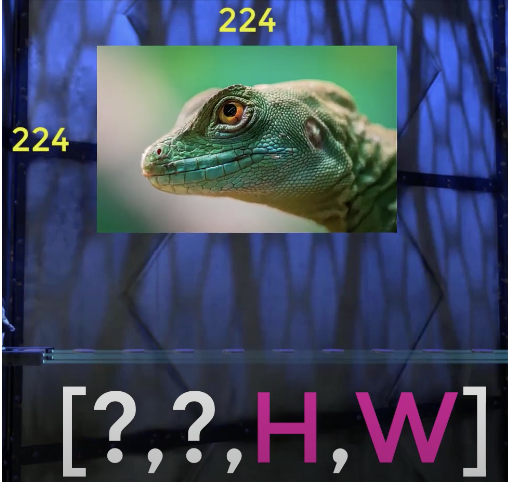
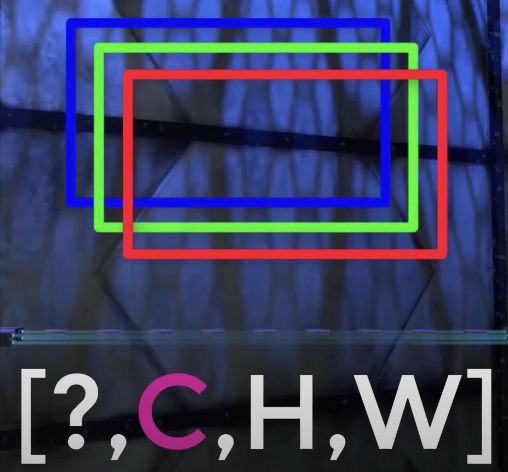
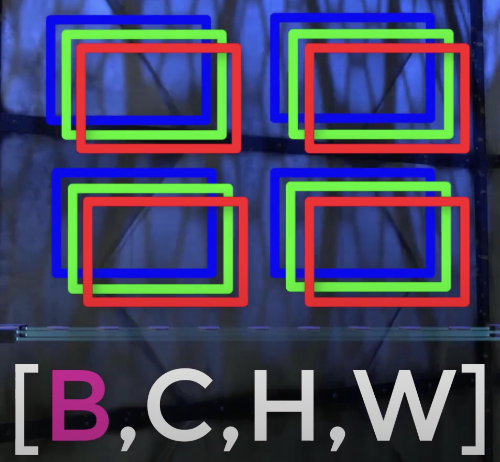

* CNN输入张量的长度通常为4：[batchsize, color_channel, height, width]；通过这4个索引，可以在特定图像的特定颜色通道中导航到特定的像素；
* 卷积神经网络的样本输入通常是批量的而不是单个的；
* 张量经过卷积层后的变化：卷积会改变高度、宽度以及颜色通道的数量；通道数与滤波器的数量有关；滤波器的大小会影响到高度和宽度；
* 经过卷积的通道不再叫彩色通道(已被改变)，而叫做特征通道(特征图:输入颜色通道和卷积滤波器所产生的卷积结果)
* 输出通道 = 特征通道 = 特征映射

/var/folders/j2/78f64m5d1917t813d_3p5k0m0000gp/T/ipykernel_23737/2210118126.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(1,2,2)


tensor([1.])

### 2.4 pytorch张量及其创建

* pytorch神经网络中必须编写的第一行程序是“数据预处理程序”
* 数据预处理的最终目标：是将我们要处理的任何数据转换成能够感知神经网络的张量

In [ ]:
torch.Tensor(array([[[[0.35169141, 0.03387213, 0.13456037, 0.73969795],
         [0.77609594, 0.55078926, 0.88907194, 0.17353792],
         [0.22556056, 0.19272942, 0.858089  , 0.00303503],
         [0.38650398, 0.88757206, 0.19083078, 0.90960158]],

        [[0.45054359, 0.7977161 , 0.3338405 , 0.73774218],
         [0.89273309, 0.63368649, 0.76243378, 0.62634403],
         [0.35792917, 0.45780819, 0.09192484, 0.38531674],
         [0.85048019, 0.51050222, 0.61169287, 0.06115809]],

        [[0.6784194 , 0.07262713, 0.96892022, 0.26921842],
         [0.88228197, 0.41993183, 0.38617743, 0.88739839],
         [0.46610311, 0.67771534, 0.43992563, 0.48813343],
         [0.78249783, 0.01202246, 0.39001106, 0.02450539]]],


       [[[0.11784653, 0.21307052, 0.34710295, 0.57643829],
         [0.52395834, 0.95324513, 0.51691304, 0.31373245],
         [0.45139143, 0.83537981, 0.98724471, 0.94841501],
         [0.36308483, 0.31871872, 0.49151524, 0.40538621]],

        [[0.31755449, 0.33550364, 0.26682866, 0.56013274],
         [0.24180998, 0.88843064, 0.61930951, 0.81990849],
         [0.58278932, 0.06025031, 0.37772634, 0.74339274],
         [0.31697997, 0.50328255, 0.18818833, 0.28306296]],

        [[0.64141715, 0.96257712, 0.35110686, 0.57843908],
         [0.12762773, 0.15559533, 0.10706141, 0.96847709],
         [0.66833719, 0.12276743, 0.48096982, 0.83267296],
         [0.01057134, 0.76238168, 0.47138151, 0.74248937]]]]))
import numpy as np

# 使用NumPy创建一个2x3x4x4的张量
tensor = np.random.rand(2, 3, 4, 4)
tensor


#### 2.4.1 张量的属性
| Data type          |   dtype     |   CPU tensor   |   GPU tensor  |
|:-----------------------|:---------------|:-----------------|:---------------|
| 32-bit floating point  | torch.float32 | torch.FloatTensor | torch.cuda.FloatTensor |
| 64-bit floating point  | torch.float64 | torch.DoubleTensor| torch.cuda.DoubleTensor|
| 16-bit floating point  | torch.float16 | torch.HalfTensor  | torch.cuda.HalfTensor |
| 8-bit integer(unsigned)| torch.uint8  | torch.BYteTensor| torch.cuda.ByteTensor|
| 8-bit integer(signed)  | torch.int8| torch.CharTensor| torch.cuda.CharTensor|
| 16-bit integer(signed) | torch,int16|torch.ShortTensor|torch.cuda.ShortTensor|
| 32-bit integer(signed) | torch.int32|torch.IntTensor| torch.cuda.IntTensor|
| 64-bit integer(signed) | torch.int64|torch.LongTensor| torch.cuda.LongTensor|

In [21]:
t = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(t.dtype)        # 指定张量中包含的数据类型
print(t.device)      # 指定数据分配的位置，CPU或GPU
print(t.layout)    # 默认值strided：告诉我们张量数据是如何在内存中布局的，通常不需要改变

torch.int64
cpu
torch.strided


* 张量与张量之间的运算必须是相同数据类型在相同的设备上发生的

#### 2.4.2 关于张量的两件事
* 张量是包含一个同一类型的数据
* 张量之间的计算依赖于类型和设备

#### 2.4.3 用数据创建pytorch张量的4种方法

In [22]:
t = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(torch.Tensor(t))           # 类构造函数
print(torch.tensor(t))           # 工厂函数
print(torch.as_tensor(t))        # 工厂函数
print(torch.from_numpy(t))       # 工厂函数


tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=torch.int32)
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=torch.int32)
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=torch.int32)


* 工厂函数：接受参数输入并返回特定类型对象的函数；
* 工厂函数允许更多的动态对象创建；具有更好的文档，并有更多的配置参数；
* 通常情况下会更倾向于选择工厂函数

#### 2.4.4 无数据情况下创建张量

In [24]:
# 单位张量的创建(二维)
torch.eye(3,3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [25]:
# 全零张量的创建（二维）
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [26]:
# 全1张量的创建(二维)
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [27]:
# 随机张量的创建(二维)
torch.rand(3,3)

tensor([[0.0187, 0.5821, 0.6798],
        [0.9749, 0.1791, 0.4112],
        [0.5518, 0.6551, 0.5451]])

### 2.5 数据创建pytorch张量的四种方法的区别

* pytorch张量是torch.tensor pytorch类的实例
* 一个张量的抽象概念和一个pytorch张量的区别在于：pytorch张量给了我们一个具体的实现，我们可以使用和编码它

#### 2.5.1 四种方法的区别1：数据类型

In [1]:
import torch
import numpy as np

data = np.array([1,2,3])
t1 = torch.Tensor(data)
print(t1)
print(t1.dtype)
t2 = torch.tensor(data)
print(t2)
print(t2.dtype)
t3 = torch.as_tensor(data)
print(t3)
print(t3.dtype)
t4 = torch.from_numpy(data)
print(t4)
print(t4.dtype)

tensor([1., 2., 3.])
torch.float32
tensor([1, 2, 3], dtype=torch.int32)
torch.int32
tensor([1, 2, 3], dtype=torch.int32)
torch.int32
tensor([1, 2, 3], dtype=torch.int32)
torch.int32


* 上述使用类构造函数和工厂函数后生成的数据类型不同，主要原因是：构造函数在构造一个张量时使用全局缺省值，而工厂函数通过输入数据的类型来推断输出数据的类型

In [5]:
# 查看全局缺省值的数据类型
d = torch.get_default_dtype
d

<function torch._C.get_default_dtype>

In [7]:
# 工厂函数可以显示指定数据类型，类构造函数不能这样操作
t = torch.tensor(np.array([1,2,3]), dtype=torch.float64)
t

tensor([1., 2., 3.], dtype=torch.float64)

#### 2.5.2 四种方法的区别2：数据分配内存方式

In [8]:
import torch
import numpy as np

data = np.array([1,2,3])
print(data)

t1 = torch.Tensor(data)
t2 = torch.tensor(data)
t3 = torch.as_tensor(data)
t4 = torch.from_numpy(data)

data[0] = 0
data[1] = 0
data[2] = 0
# t1 和 t2 输出的都是更改前的数组
print(t1)
print(t2)
# t3 和 t4 输出的都是更改后的数组
print(t3)
print(t4)

[1 2 3]
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([0, 0, 0], dtype=torch.int32)
tensor([0, 0, 0], dtype=torch.int32)


* 上述差异是由创建时分配内存的方式造成的：t1和t2的方式是将数组中的元素值直接拷贝到张量中，改变data中的元素值并不会影响到t1和t2中的值；t3和t4的方式是与data数组共享数据；（可将t1和t2的方式看作"值传递"；t3和t4的方式看作“地址传递”）
|    共享数据    |    数据拷贝   |
|:-----------------|:----------------|
| torch.as_tensor() | torch.tensor()|
| torch.from_numpy()| torch.Tensor()|
* 由上可知numpy和tensor是数据共享的，所以他们可以无缝切换
* 数据共享比数据拷贝更高效，更节省内存空间

#### 2.5.3 最优的数据转换方法
* 数据拷贝方式的最优选择是 torch.tensor() (因为是工厂函数)
* 内存共享方式的最优选择是 torch.as_tensor() (因为torch.as_tensor可以接受任何python数据结构；而torch.from_numpy只接受numpy数组)
* 数据拷贝的方式更注重实现；而内存共享的方式更注重代码性能

#### 2.5.4 使用内存共享工厂函数的注意事项：
* 1.由于numpy.ndaaray对象分配在CPU上，所以如果使用GPU的话，torch.as_tensor函数必须把数据从CPU上拷到GPU上
* 2.as_tensor()对于python内置的数据结构，如列表，是无效的
* 3.as_tensor的调用要求熟悉共享特征，以免对底层数据做不必要的更改，而影响到对象
* 4.当as_tensor和numpy.ndarray有大量的相互往返的操作时，对性能的提升会有较大的影响

### 2.6 张量的重塑操作(reshaping)
#### 2.6.1 常用张量操作类型
* Reshaping operations
* Element-wise operations
* Reduction operations
* Access operations
#### 2.6.2 张量的重塑
* 张量的重塑是最重要的张量操作：因为张量的形状能提供给我们一些具体的东西，我们可以用它来塑造和直观的理解张量

In [1]:
import torch
t = torch.tensor([[1,1,1,1],
                 [2,2,2,2],
                  [3,3,3,3]], dtype=torch.float32)
print(t.size)
print(t.shape)
                  

<built-in method size of Tensor object at 0x0000016A54552B88>
torch.Size([3, 4])


In [3]:
# 得到张量中的元素个数
# 方法1：
torch.tensor(t.shape).prod()

tensor(12)

In [4]:
# 方法2：
t.numel()         # numel 是number of elements的简写

12

* 元素的个数与张量的重塑有直接的关系，重塑后每个轴长之积必须与元素个数相同

In [5]:
# 张量的reshape,squeezing和unsqueezing
print(t.reshape(1,12))
print(t.reshape(1,12).shape)
print(t.reshape(1,12).squeeze())
print(t.reshape(1,12).squeeze().shape)
print(t.reshape(1,12).squeeze().unsqueeze(dim=0))
print(t.reshape(1,12).squeeze().unsqueeze(dim=0).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])
tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])
tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


* squeezing:可以移除所有长度为1的轴 (减少秩)
* unsqueezing: 会增加一个长度为1的轴 （增加秩）
* flatten张量：除去所有的轴，只保留一个，创造一个单轴张量包含原张量所有元素；
* flatten操作是从一个卷积层过度到一个全连接层时在神经网络中必须发生的；
* flatten操作是一种特殊的reshaping操作，即所有轴被挤压成一个轴

In [7]:
# 张量的flatten
t = torch.tensor([[1,1,1,1],
                 [2,2,2,2],
                  [3,3,3,3]], dtype=torch.float32)
# 方法1：
def flatten(t):
    t1 = t.reshape(1,-1)      # -1:根据输入t的总元素数确定该值为多少
    t1 = t1.squeeze()
    return t1
print(flatten(t))    

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])


In [8]:
# 方法2：
t2 = t.reshape(1,-1)[0]
print(t2)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])


In [9]:
# 方法3：
t3 = t.reshape(-1)
t3

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [11]:
# 方法4：
t4 = t.view(t.numel())
t4

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [12]:
# 方法5：
t5 = t.flatten()
t5

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

### 2.7 多批次张量的flatten
* flatten操作的前提：张量至少有两个轴
* 全连接层接收被flatten的张量来作为输入
* 多批次张量的flatten：保持batch的长度不变，只flatten图像通道部分

In [13]:
# t1,t2,t3为三个4x4的图像
t1 = torch.tensor([
            [1,1,1,1],
            [1,1,1,1],
            [1,1,1,1],
            [1,1,1,1]
        ])

t2 = torch.tensor([
            [2,2,2,2],
            [2,2,2,2],
            [2,2,2,2],
            [2,2,2,2]
        ])

t3 = torch.tensor([
            [3,3,3,3],
            [3,3,3,3],
            [3,3,3,3],
            [3,3,3,3]
        ])
# 使用stack将其合并成一个秩为3的张量
t = torch.stack((t1,t2,t3))
print(t.shape)    
# 增加一个彩色通道轴，将其变成CNN期望的形式，以上三张图像均为灰度图像
t = t.reshape(3,1,4,4)
print(t[0])    # 第一个图像
print(t[0][0])     # 第一个图像的第一个通道
print(t[0][0][0])  # 第一个图像的第一个通道中的第一行像素
print(t[0][0][0][0])   # 第一个图像的第一个通道中的第一行的第一个像素

# 该张量的flatten:我们期望只将图像张量flatten，而不是全部flatten
print(t.flatten(start_dim=1).shape)  
print(t.flatten(start_dim=1))  # 参数start_dim告诉flatten函数应该从哪个轴开始

torch.Size([3, 4, 4])
tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])
tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])
tensor([1, 1, 1, 1])
tensor(1)
torch.Size([3, 16])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])


### 2.8 张量的操作
#### 2.8.1 张量的元素运算(element-wise operation)
* 元素运算是对张量元素的运算，这些元素在张量中对应或具有相同的位置索引
* 两个张量必须有相同的形状才能执行元素操作

In [14]:
t1 = torch.tensor([
                [1,2],
                [3,4]
            ], dtype=torch.float32)

t2 = torch.tensor([
                [9,8],
                [7,6]
            ], dtype=torch.float32)

In [15]:
t1 + t2

tensor([[10., 10.],
        [10., 10.]])

In [16]:
t1 +2

tensor([[3., 4.],
        [5., 6.]])

In [17]:
t1 -2

tensor([[-1.,  0.],
        [ 1.,  2.]])

In [18]:
t1 * 2

tensor([[2., 4.],
        [6., 8.]])

In [19]:
t1 /2 

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

#### 2.8.2 张量的广播
* 张量的广播：定义了在元素操作的过程中如何处理不同形状的张量，即：将标量变成与另一个张量相同的形状
* 张量广播在数据标准化时会常用到

In [27]:
import torch
import numpy as np
t1 = torch.tensor([
                [1,1],
                [1,1]
            ])
t2 = torch.tensor([2,4])
print(t1+t2)
np.broadcast_to(t2.numpy,t1.shape) #广播
t1 + t2

tensor([[3, 5],
        [3, 5]])


tensor([[3, 5],
        [3, 5]])

#### 2.8.3 张量的比较运算
* 会返回一个与比较张量形状相同的张量，其值为0或1（0表示False；1表示True）
* element-wise,component-wise以及point-wise的操作方式均相同

### 2.9 张量的缩减操作（reduction）
* 缩减操作是一个减少张量中包含的元素数量的操作
* 元素操作允许我们对多个张量进行操作；缩减操作允许我们对单个张量进行操作

In [28]:
t = torch.tensor([
                [0,1,0],
                [2,0,2],
                [0,3,0]
            ], dtype = torch.float32)
print(t.sum()) 
print(t.numel())  
print(t.sum().numel()) 
print(t.sum().numel() < t.numel())  

tensor(8.)
9
1
True


由上可知，求和操作是缩减操作，缩减操作还有：
* t.sum()
* t.prod()
* t.mean()
* t.std()

In [29]:
# 缩减操作通常允许跨数据结构计算总值
# 对某个轴进行缩减操作
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)
t.sum(dim=0)

tensor([6., 6., 6., 6.])

In [30]:
t.sum(dim=1)

tensor([ 4.,  8., 12.])

* argmax函数：得到张量的最大输出值的对应索引位置
* 在实际应用中，经常在神经网络输出预测张量上使用argmax，确定哪个类别的预测最高

In [32]:
t = torch.tensor([
                [1,0,0,2],
                [0,3,3,0],
                [4,0,0,5]
            ], dtype=torch.float32)
t.max() 

tensor(5.)

In [33]:
t.argmax()            # 输出的是flatten后的索引

tensor(11)